# Current bias of a JJ

\begin{align}
U(\delta) = -E_J \left( \cos\delta + \frac{I_b}{I_c}\delta \right)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')

In [2]:
from numpy import pi,cos,sin

In [3]:
delta = np.linspace(-2*pi,8*pi,401)

In [4]:
currs = [0,0.5,1,1.5]

In [5]:
from matplotlib import colors

In [6]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

## sinusoidal CPR

In [7]:
def U(delta,i):
    return -(cos(delta)+i*delta)

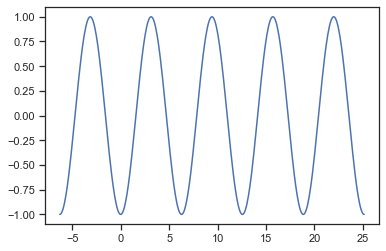

In [8]:
plt.plot(delta,U(delta,0))

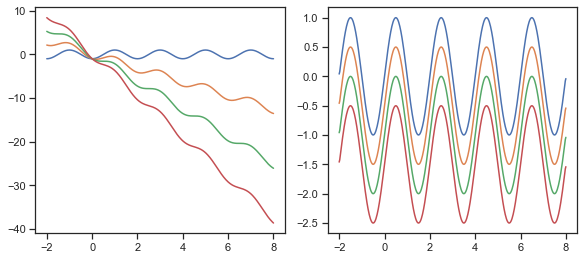

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3.5),constrained_layout=True)
plt.sca(ax1)
for i in currs:
    plt.plot(delta/pi,U(delta,i),label=i)
plt.sca(ax2)
for i in currs:
    plt.plot(delta/pi,np.gradient(U(delta,i),delta),label=i)
plt.show()
plt.close()

In [10]:
X,Y = np.meshgrid(delta,np.linspace(0,1.5,len(delta)))
Z = U(X,Y)
Z2 = np.gradient(U(X,Y))[1]

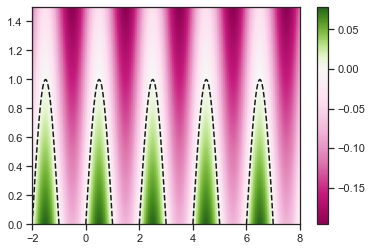

In [11]:
#pcm = plt.pcolormesh(X/pi,Y,Z)#,vmin=-0.1,vmax=0.1,cmap='PiYG')
pcm = plt.pcolormesh(X/pi,Y,Z2,cmap='PiYG',norm=MidpointNormalize(vmin=np.min(Z2), midpoint=0, vmax=np.max(Z2)))
plt.colorbar()
plt.contour(X/pi,Y,Z2,levels=[0],colors='k',linestyles='--')
plt.show()
plt.close()

## short ballistic

In [12]:
def U2(delta,i,tau,**kwargs):
    x1 = np.sqrt(1-tau*sin(delta/2)**2)
    dx = (np.nanmax(x1)+np.nanmin(x1))/2
    x2 = x1-dx
    dy = (np.nanmax(x2)-np.nanmin(x2))/2
    x = -x2/dy-i*delta
    return x

In [13]:
mytau=0.999

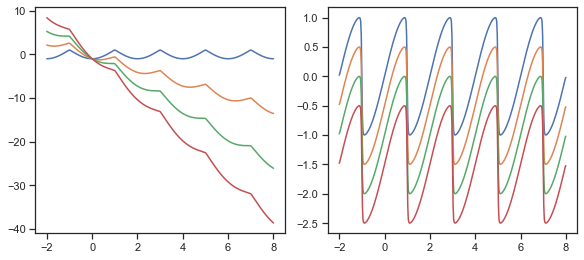

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3.5),constrained_layout=True)
plt.sca(ax1)
for i in currs:
    plt.plot(delta/pi,U2(delta,i,tau=mytau),label=i)
plt.sca(ax2)
for i in currs:
    plt.plot(delta/pi,np.gradient(U2(delta,i,tau=mytau),delta),label=i)
plt.show()
plt.close()

In [15]:
X,Y = np.meshgrid(delta,np.linspace(0,1.5,len(delta)))
Z = U2(X,Y,tau=mytau)
Z2 = np.gradient(U2(X,Y,tau=mytau))[1]

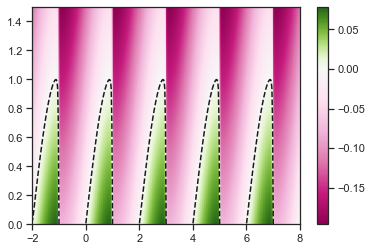

In [16]:
#pcm = plt.pcolormesh(X/pi,Y,Z)#,vmin=-0.1,vmax=0.1,cmap='PiYG')
pcm = plt.pcolormesh(X/pi,Y,Z2,cmap='PiYG',norm=MidpointNormalize(vmin=np.min(Z2), midpoint=0, vmax=np.max(Z2)))
plt.colorbar()
plt.contour(X/pi,Y,Z2,levels=[0],colors='k',linestyles='--')
plt.show()
plt.close()